In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Quikr_car.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'Quikr_car.csv'

In [ ]:
df.info()

In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)
df

In [ ]:
len(df['Name'].unique())

In [ ]:
df['Name']=df['Name'].str.split(" ")

In [ ]:
df['Name']=df['Name'].str.slice(0,3).str.join(" ")
df['Name']

In [ ]:
hyphenReplace=lambda x:x.replace('-','')
df['Name']=df['Name'].apply(hyphenReplace)
df['Name']

In [ ]:
for i in range(9):
    print("The umber of null values in column ",i," are: ")
    nullcheck=df.iloc[:,i].isnull().sum()
    print(nullcheck)

In [ ]:
df[df['Location'].isnull()]

In [ ]:
nullloc=df[df['Location'].isnull()].index
nullloc

In [ ]:
df=df.drop(nullloc)
df

In [ ]:
for i in range(9):
    print("The umber of null values in column ",i," are: ")
    nullcheck=df.iloc[:,i].isnull().sum()
    print(nullcheck)

The umber of null values in column  0  are: 
0
The umber of null values in column  1  are: 
0
The umber of null values in column  2  are: 
0
The umber of null values in column  3  are: 
0
The umber of null values in column  4  are: 
0
The umber of null values in column  5  are: 
0
The umber of null values in column  6  are: 
291
The umber of null values in column  7  are: 
0
The umber of null values in column  8  are: 
0


In [ ]:
df['Price']=df['Price'].str.replace(',','')
df['Price']=df['Price'].str.replace('₹','')
df['Price']

0        380000
1        465000
2       1350000
3       1019699
4        713499
         ...   
1027     229000
1028     275000
1029    1750000
1030    1750000
1031    1750000
Name: Price, Length: 1030, dtype: object

In [ ]:
askforprice=df[df['Price']=='Ask For Price'].index
askforprice

Index([260, 316, 356, 546, 644, 934], dtype='int64')

In [ ]:
df=df.drop(askforprice)

In [ ]:
df['Price']=pd.to_numeric(df['Price'])
df['Price'].min()

39000

In [ ]:
df['Price'].max()

7500000

In [ ]:
df['Kms_driven']=df['Kms_driven'].str.replace(',','')
df['Kms_driven']=df['Kms_driven'].str.replace(' kms','')
df['Kms_driven']=pd.to_numeric(df['Kms_driven'])
df['Kms_driven']

0       35056
1       44000
2       42917
3       16112
4       30988
        ...  
1027    65000
1028    60000
1029    31000
1030    31000
1031    31000
Name: Kms_driven, Length: 1024, dtype: int64

In [ ]:
df['Kms_driven'].min()

0

In [ ]:
df['Kms_driven'].max()

690000

In [ ]:
df=df.drop(['Owner'],axis=1)
df

,Name,Label,Location,Price,Kms_driven,Fuel_type,Year,Company
0,Ford Figo Duratec,PLATINUM,Bangalore,380000,35056,Petrol,2015,Ford
1,Maruti Suzuki Wagon,PLATINUM,Bangalore,465000,44000,Petrol,2016,Maruti
2,Hyundai Creta 1.6,PLATINUM,Bangalore,1350000,42917,Petrol,2018,Hyundai
3,Hyundai Venue,PLATINUM,Chennai,1019699,16112,Petrol,2019,Hyundai
4,Honda Jazz,PLATINUM,Pune,713499,30988,Petrol,2017,Honda
...,...,...,...,...,...,...,...,...
1027,Hyundai i10 Magna,GOLD,Bangalore,229000,65000,Petrol,2014,Hyundai
1028,Maruti Suzuki Alto,GOLD,Bangalore,275000,60000,Petrol,2014,Maruti
1029,Jeep Compass Limited,GOLD,Mahasamund,1750000,31000,Diesel,2017,Jeep
1030,Jeep Compass Limited,GOLD,Bilaspur,1750000,31000,Diesel,2017,Jeep


In [ ]:
for i in range (8):
    print("The number of null values in column",i,"are:")
    nullcheck=df.iloc[:,i].isnull().sum()
    print(nullcheck)

The number of null values in column 0 are:
0
The number of null values in column 1 are:
0
The number of null values in column 2 are:
0
The number of null values in column 3 are:
0
The number of null values in column 4 are:
0
The number of null values in column 5 are:
0
The number of null values in column 6 are:
0
The number of null values in column 7 are:
0


In [ ]:
df['Label'].unique()

array(['PLATINUM', 'GOLD'], dtype=object)

In [ ]:
labels={'GOLD':1,'PLATINUM':2}
df['Label']=df['Label'].replace(labels)
df['Label']

0       2
1       2
2       2
3       2
4       2
       ..
1027    1
1028    1
1029    1
1030    1
1031    1
Name: Label, Length: 1024, dtype: int64

In [ ]:
dummies1=pd.get_dummies(df['Location'],dtype=int)
dummies1

,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,BolpurSantiniketan,Chandigarh,Chennai,Coimbatore,Delhi,...,Nagpur,Nanded,NaviMumbai,Pondicherry,Pune,Surat,Thane,Trichy,Udaipur,Uttarpara
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1028,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1030,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df=df.drop(['Location'],axis=1)
df=pd.concat([df,dummies1],axis=1)
df

,Name,Label,Price,Kms_driven,Fuel_type,Year,Company,Ahmedabad,Anand,Bangalore,...,Nagpur,Nanded,NaviMumbai,Pondicherry,Pune,Surat,Thane,Trichy,Udaipur,Uttarpara
0,Ford Figo Duratec,2,380000,35056,Petrol,2015,Ford,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Maruti Suzuki Wagon,2,465000,44000,Petrol,2016,Maruti,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Hyundai Creta 1.6,2,1350000,42917,Petrol,2018,Hyundai,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Hyundai Venue,2,1019699,16112,Petrol,2019,Hyundai,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Honda Jazz,2,713499,30988,Petrol,2017,Honda,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Hyundai i10 Magna,1,229000,65000,Petrol,2014,Hyundai,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1028,Maruti Suzuki Alto,1,275000,60000,Petrol,2014,Maruti,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1029,Jeep Compass Limited,1,1750000,31000,Diesel,2017,Jeep,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1030,Jeep Compass Limited,1,1750000,31000,Diesel,2017,Jeep,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df=df.drop(df.columns[45],axis=1)
df

,Name,Label,Price,Kms_driven,Fuel_type,Year,Company,Ahmedabad,Anand,Bangalore,...,Muzaffarnagar,Nagpur,Nanded,NaviMumbai,Pondicherry,Pune,Surat,Thane,Trichy,Udaipur
0,Ford Figo Duratec,2,380000,35056,Petrol,2015,Ford,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Maruti Suzuki Wagon,2,465000,44000,Petrol,2016,Maruti,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Hyundai Creta 1.6,2,1350000,42917,Petrol,2018,Hyundai,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Hyundai Venue,2,1019699,16112,Petrol,2019,Hyundai,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Honda Jazz,2,713499,30988,Petrol,2017,Honda,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Hyundai i10 Magna,1,229000,65000,Petrol,2014,Hyundai,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1028,Maruti Suzuki Alto,1,275000,60000,Petrol,2014,Maruti,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1029,Jeep Compass Limited,1,1750000,31000,Diesel,2017,Jeep,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1030,Jeep Compass Limited,1,1750000,31000,Diesel,2017,Jeep,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dummies2=pd.get_dummies(df['Fuel_type'],dtype=int)
dummies2

,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol,Petrol + CNG
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1027,0,0,0,0,0,0,0,0,1,0
1028,0,0,0,0,0,0,0,1,0,0
1029,0,0,0,1,0,0,0,0,0,0
1030,0,0,0,1,0,0,0,0,0,0


In [ ]:
df=df.drop(['Fuel_type'],axis=1)
df=pd.concat([df,dummies2],axis=1)
df=df.drop(df.columns[53],axis=1)
df

,Name,Label,Price,Kms_driven,Year,Company,Ahmedabad,Anand,Bangalore,Bhubaneswar,...,Udaipur,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol
0,Ford Figo Duratec,2,380000,35056,2015,Ford,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,Maruti Suzuki Wagon,2,465000,44000,2016,Maruti,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Hyundai Creta 1.6,2,1350000,42917,2018,Hyundai,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,Hyundai Venue,2,1019699,16112,2019,Hyundai,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Honda Jazz,2,713499,30988,2017,Honda,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Hyundai i10 Magna,1,229000,65000,2014,Hyundai,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1028,Maruti Suzuki Alto,1,275000,60000,2014,Maruti,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1029,Jeep Compass Limited,1,1750000,31000,2017,Jeep,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1030,Jeep Compass Limited,1,1750000,31000,2017,Jeep,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.reset_index(drop=True)
df

,Name,Label,Price,Kms_driven,Year,Company,Ahmedabad,Anand,Bangalore,Bhubaneswar,...,Udaipur,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol
0,Ford Figo Duratec,2,380000,35056,2015,Ford,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,Maruti Suzuki Wagon,2,465000,44000,2016,Maruti,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Hyundai Creta 1.6,2,1350000,42917,2018,Hyundai,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,Hyundai Venue,2,1019699,16112,2019,Hyundai,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Honda Jazz,2,713499,30988,2017,Honda,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Hyundai i10 Magna,1,229000,65000,2014,Hyundai,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1028,Maruti Suzuki Alto,1,275000,60000,2014,Maruti,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1029,Jeep Compass Limited,1,1750000,31000,2017,Jeep,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1030,Jeep Compass Limited,1,1750000,31000,2017,Jeep,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
sns.set_style("darkgrid")

<ipython-input-33-e688d1e36a79>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


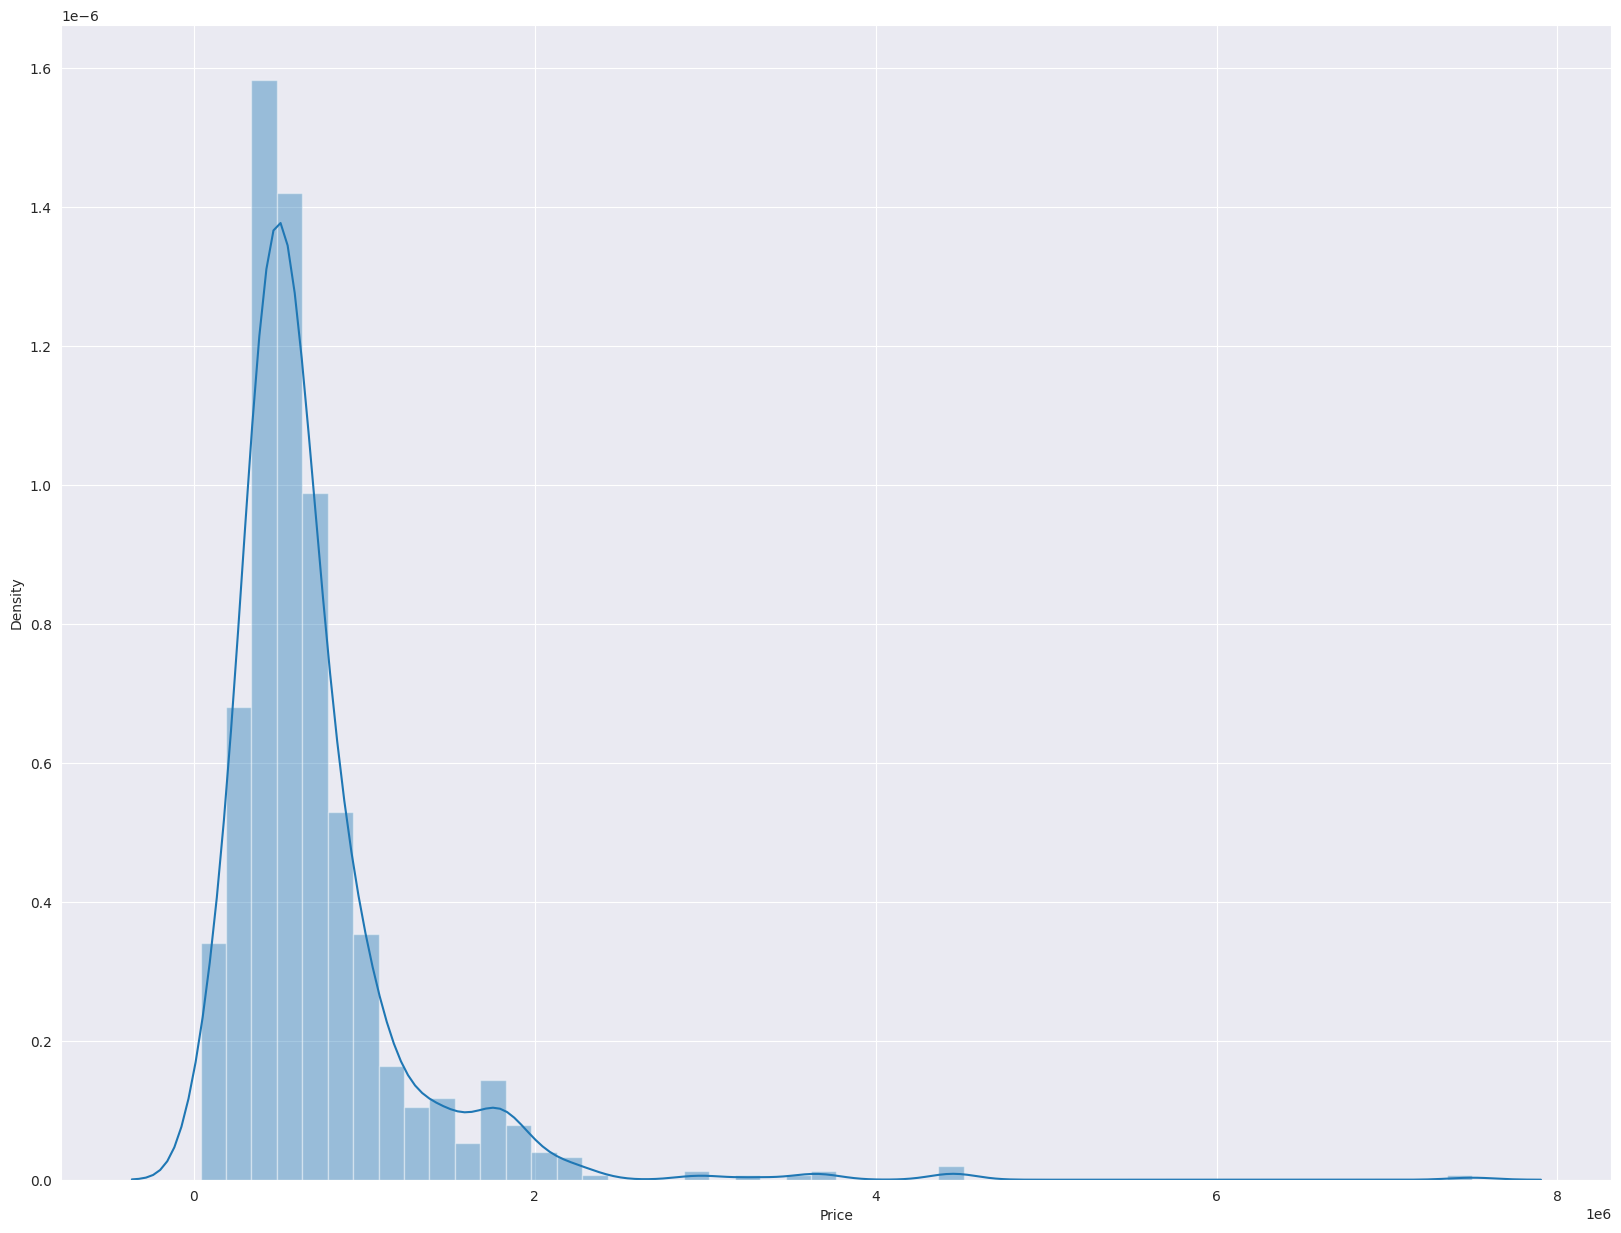

In [ ]:
plt.figure(figsize=(20,15))
sns.distplot(df['Price'])
plt.show()

In [ ]:
df.corr(numeric_only=True)

,Label,Price,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,BolpurSantiniketan,...,Udaipur,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol
Label,1.000000,-0.082353,-0.297303,0.387619,-0.100014,-0.044640,0.173986,-0.063162,-0.044640,-0.044640,...,-0.044640,-0.038941,-0.077395,-0.534412,0.092042,-0.063162,-0.044640,-0.044640,-0.525964,0.690089
Price,-0.082353,1.000000,-0.097850,0.381180,0.012315,0.022350,-0.070198,-0.034907,0.061922,0.047374,...,-0.022751,-0.039780,0.038749,0.195467,0.212030,0.096672,-0.005583,-0.025952,-0.152371,-0.181379
Kms_driven,-0.297303,-0.097850,1.000000,-0.501249,-0.041741,0.003085,-0.058897,0.014809,-0.015780,0.011201,...,0.004725,0.020990,0.005348,0.329016,0.127492,-0.009562,-0.005036,0.038354,0.075966,-0.372923
Year,0.387619,0.381180,-0.501249,1.000000,0.012028,0.020136,0.016311,-0.095572,0.010906,-0.035242,...,-0.016783,-0.045099,0.034911,-0.130506,0.094730,-0.030276,0.001676,-0.109080,-0.355474,0.280770
Ahmedabad,-0.100014,0.012315,-0.041741,0.012028,1.000000,-0.002190,-0.040442,-0.003099,-0.002190,-0.002190,...,-0.002190,-0.003797,-0.003797,0.015114,0.047645,-0.003099,-0.002190,-0.002190,-0.029246,-0.022230
Anand,-0.044640,0.022350,0.003085,0.020136,-0.002190,1.000000,-0.018051,-0.001383,-0.000978,-0.000978,...,-0.000978,-0.001695,0.576786,-0.011975,-0.013355,-0.001383,-0.000978,-0.000978,-0.013053,-0.035102
Bangalore,0.173986,-0.070198,-0.058897,0.016311,-0.040442,-0.018051,1.000000,-0.025540,-0.018051,-0.018051,...,-0.018051,-0.031296,-0.031296,-0.099593,-0.090527,0.025540,-0.018051,-0.018051,-0.050747,0.178226
Bhubaneswar,-0.063162,-0.034907,0.014809,-0.095572,-0.003099,-0.001383,-0.025540,1.000000,-0.001383,-0.001383,...,-0.001383,-0.002398,-0.002398,-0.016943,-0.018896,-0.001957,-0.001383,-0.001383,0.105956,-0.049666
Bilaspur,-0.044640,0.061922,-0.015780,0.010906,-0.002190,-0.000978,-0.018051,-0.001383,1.000000,-0.000978,...,-0.000978,-0.001695,-0.001695,-0.011975,0.073197,-0.001383,-0.000978,-0.000978,-0.013053,-0.035102
BolpurSantiniketan,-0.044640,0.047374,0.011201,-0.035242,-0.002190,-0.000978,-0.018051,-0.001383,-0.000978,1.000000,...,-0.000978,-0.001695,-0.001695,0.081630,-0.013355,-0.001383,-0.000978,-0.000978,-0.013053,-0.035102


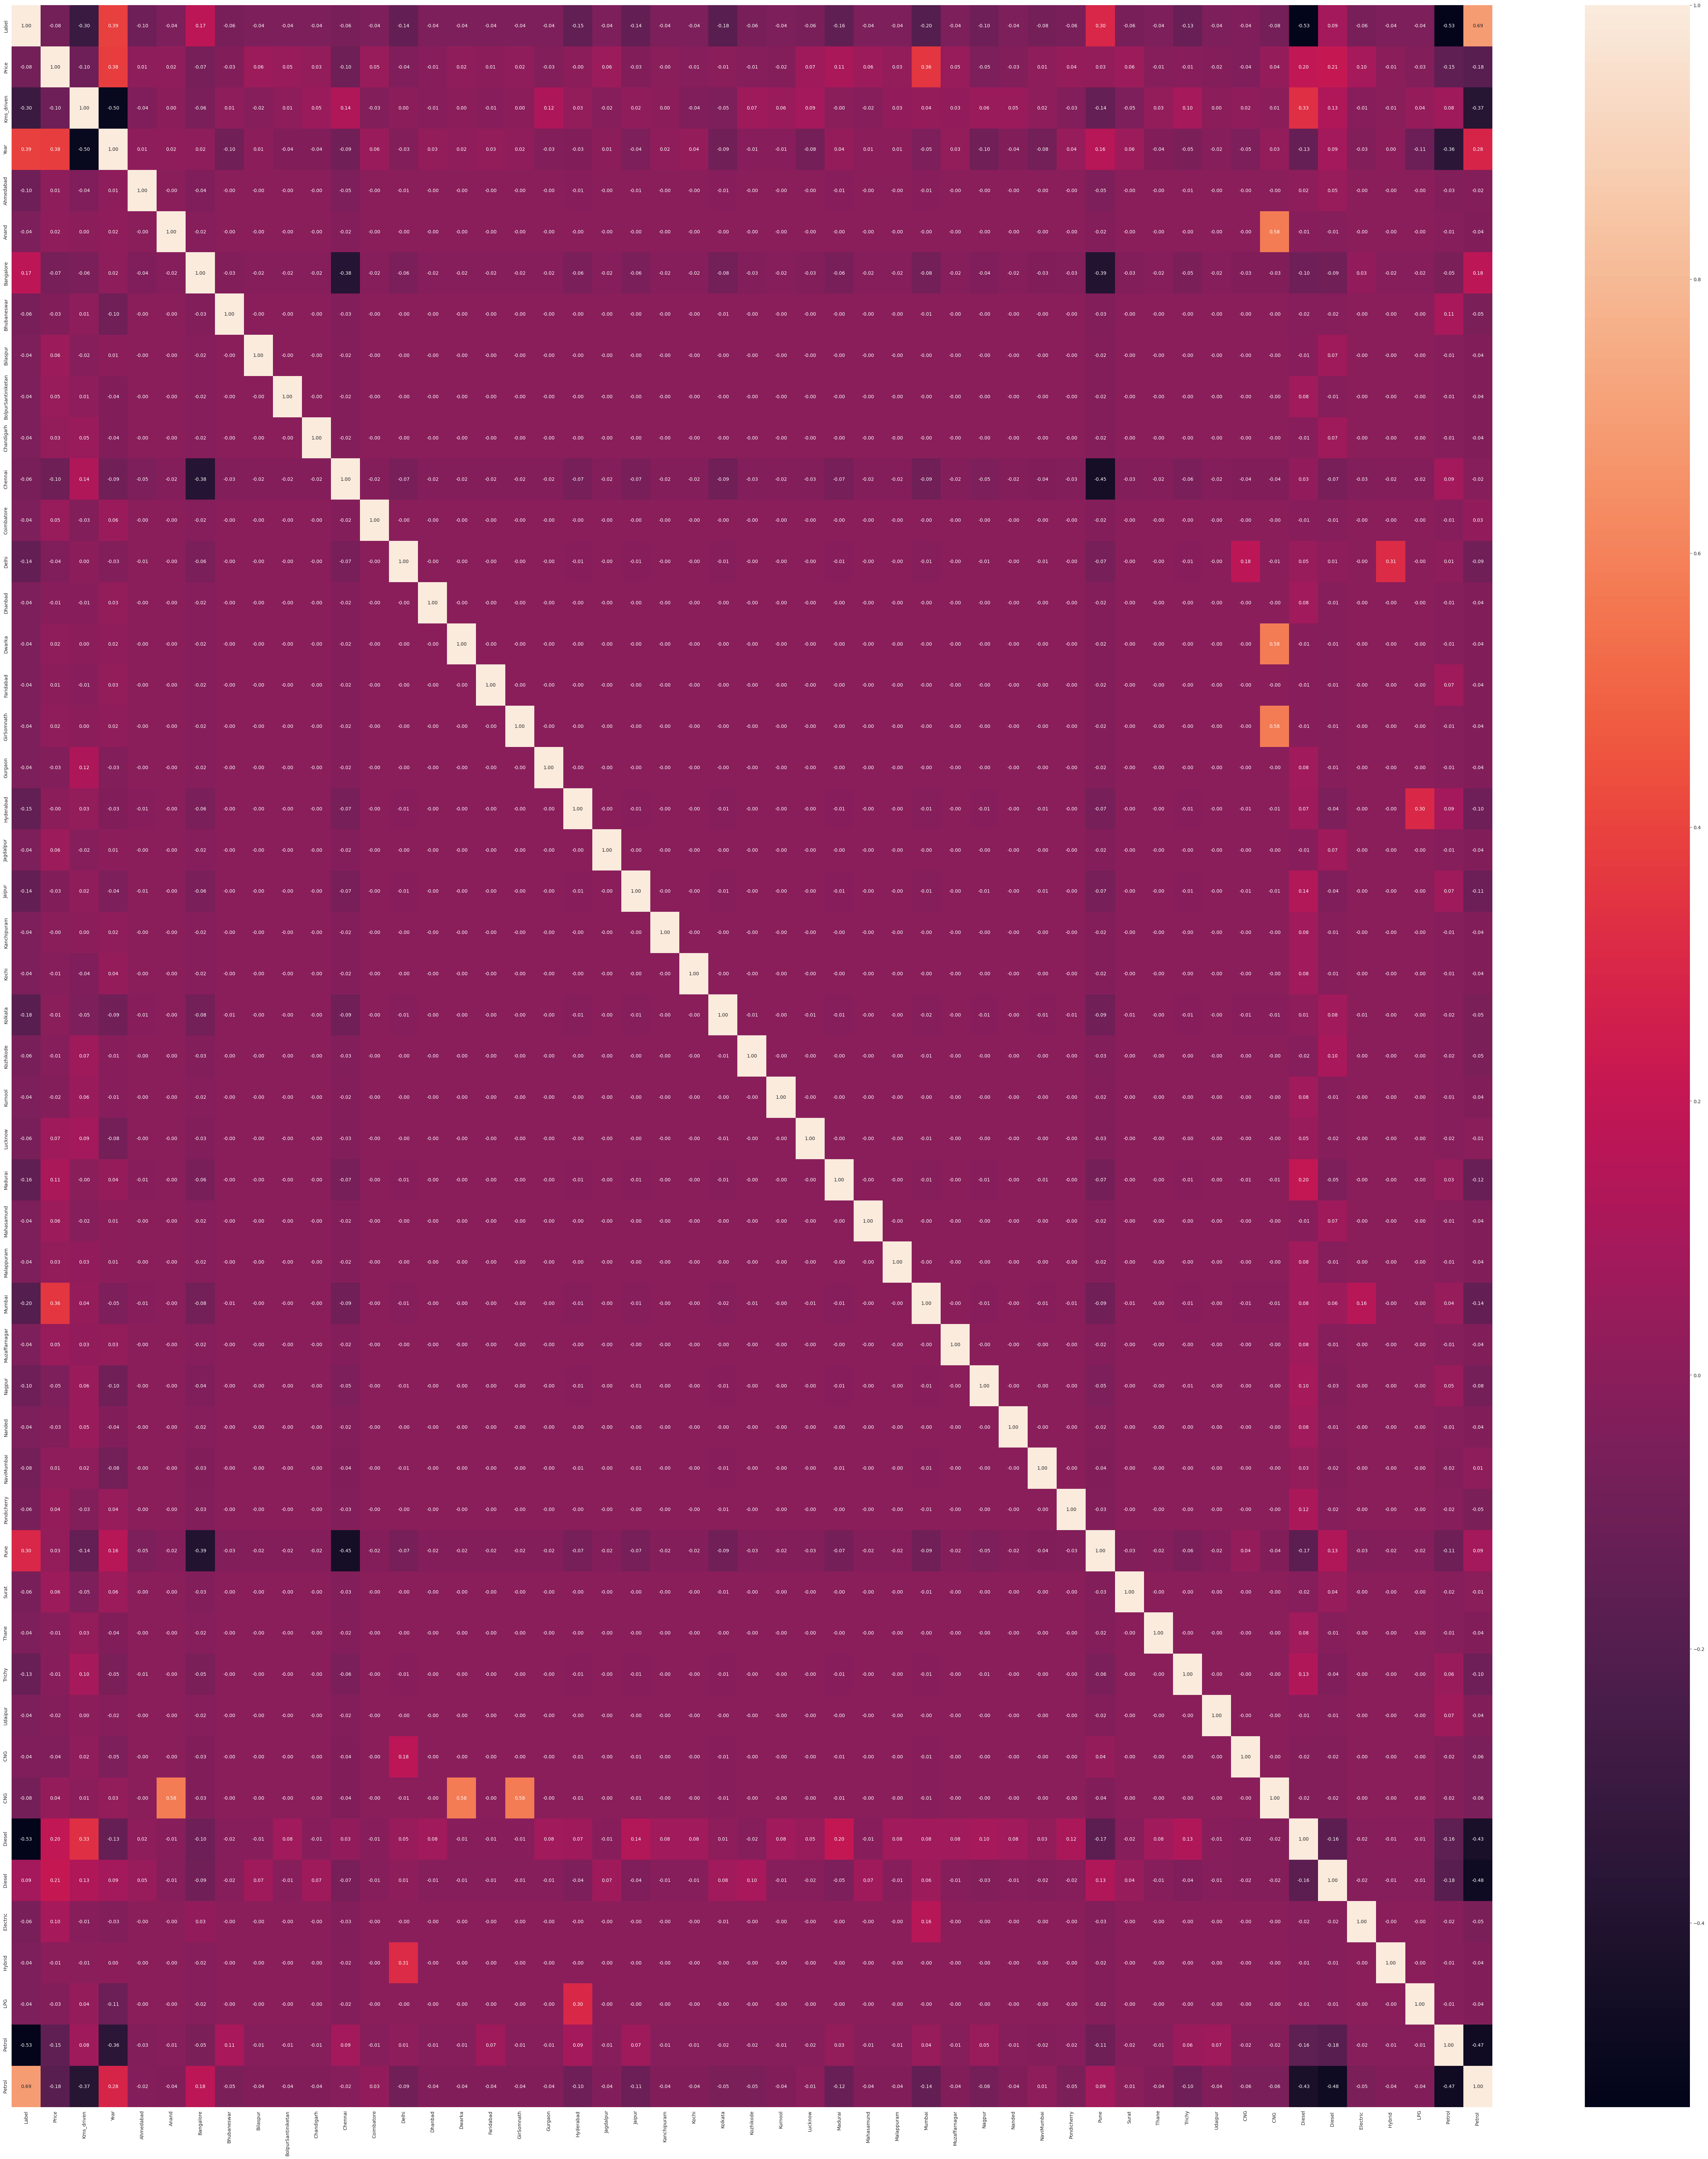

In [ ]:
plt.figure(figsize=(70,80))
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation,annot=True,fmt='0.2f')
plt.show()

In [ ]:
label1=df[df['Label']==1]
label1

,Name,Label,Price,Kms_driven,Year,Company,Ahmedabad,Anand,Bangalore,Bhubaneswar,...,Udaipur,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol
16,Toyota Innova 2.5,1,1025000,131000,2012,Toyota,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
17,Hyundai Elite i20,1,735000,26000,2016,Hyundai,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
18,Hyundai Creta 1.6,1,600000,58460,2019,Hyundai,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19,Kia Seltos,1,800000,48000,2020,Kia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20,Maruti Suzuki Ciaz,1,700000,26600,2017,Maruti,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Hyundai i10 Magna,1,229000,65000,2014,Hyundai,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1028,Maruti Suzuki Alto,1,275000,60000,2014,Maruti,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1029,Jeep Compass Limited,1,1750000,31000,2017,Jeep,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1030,Jeep Compass Limited,1,1750000,31000,2017,Jeep,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
label2=df[df['Label']==2]
label2

,Name,Label,Price,Kms_driven,Year,Company,Ahmedabad,Anand,Bangalore,Bhubaneswar,...,Udaipur,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol
0,Ford Figo Duratec,2,380000,35056,2015,Ford,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,Maruti Suzuki Wagon,2,465000,44000,2016,Maruti,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Hyundai Creta 1.6,2,1350000,42917,2018,Hyundai,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,Hyundai Venue,2,1019699,16112,2019,Hyundai,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Honda Jazz,2,713499,30988,2017,Honda,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,Maruti Suzuki Baleno,2,681399,43287,2016,Maruti,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1020,Datsun Redi GO,2,415699,26527,2018,Datsun,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1021,Maruti Suzuki Alto,2,300199,37801,2017,Maruti,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1022,Maruti Suzuki Vitara,2,856699,54044,2017,Maruti,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


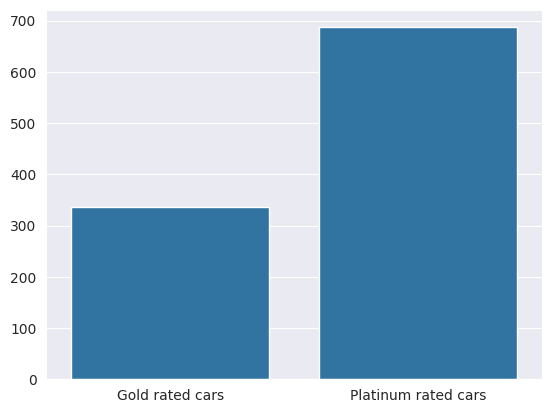

In [ ]:
sns.barplot(x=['Gold rated cars','Platinum rated cars'],y=[len(label1),len(label2)])
plt.show()

In [ ]:
df2 = df.groupby(['Company']).count()
df2

,Name,Label,Price,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,...,Udaipur,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol
Company,,,,,,,,,,,,,,,,,,,,,
Audi,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
BMW,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
Chevrolet,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
Datsun,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Fiat,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Ford,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
Honda,78,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
Hyundai,226,226,226,226,226,226,226,226,226,226,...,226,226,226,226,226,226,226,226,226,226
Jaguar,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [ ]:
df3=df2.sort_values(by=['Name'],ascending=False)
df3

,Name,Label,Price,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,...,Udaipur,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol
Company,,,,,,,,,,,,,,,,,,,,,
Maruti,382,382,382,382,382,382,382,382,382,382,...,382,382,382,382,382,382,382,382,382,382
Hyundai,226,226,226,226,226,226,226,226,226,226,...,226,226,226,226,226,226,226,226,226,226
Honda,78,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
Ford,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
Tata,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
Renault,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
Toyota,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
Mahindra,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
Volkswagen,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29


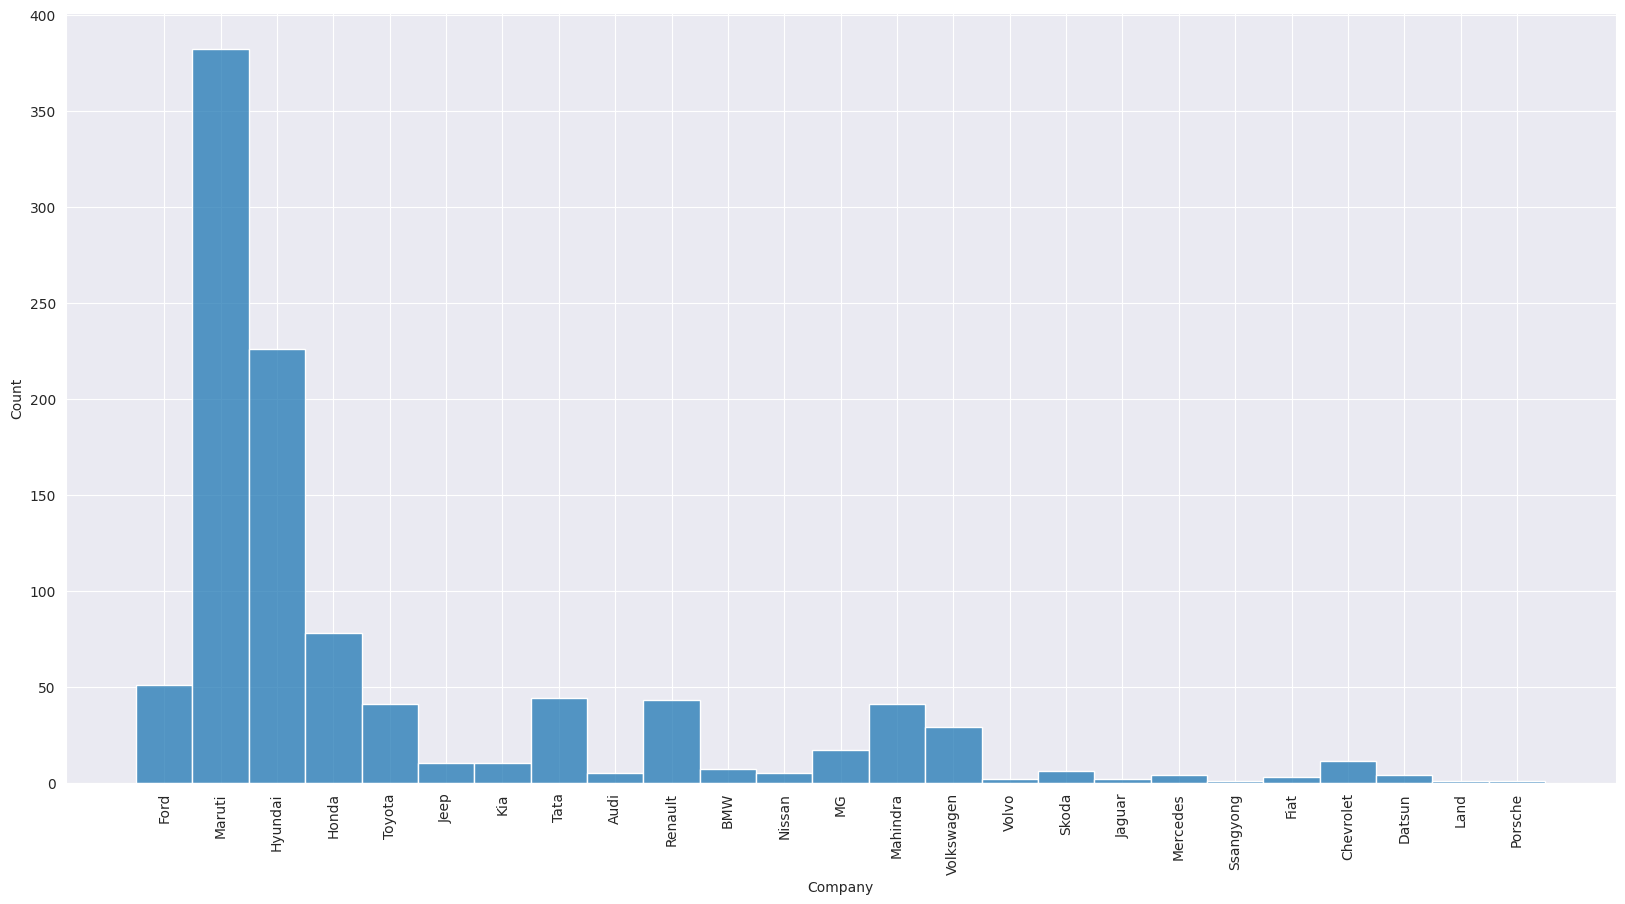

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(x=df['Company'])
plt.xticks(rotation=90)
plt.show()

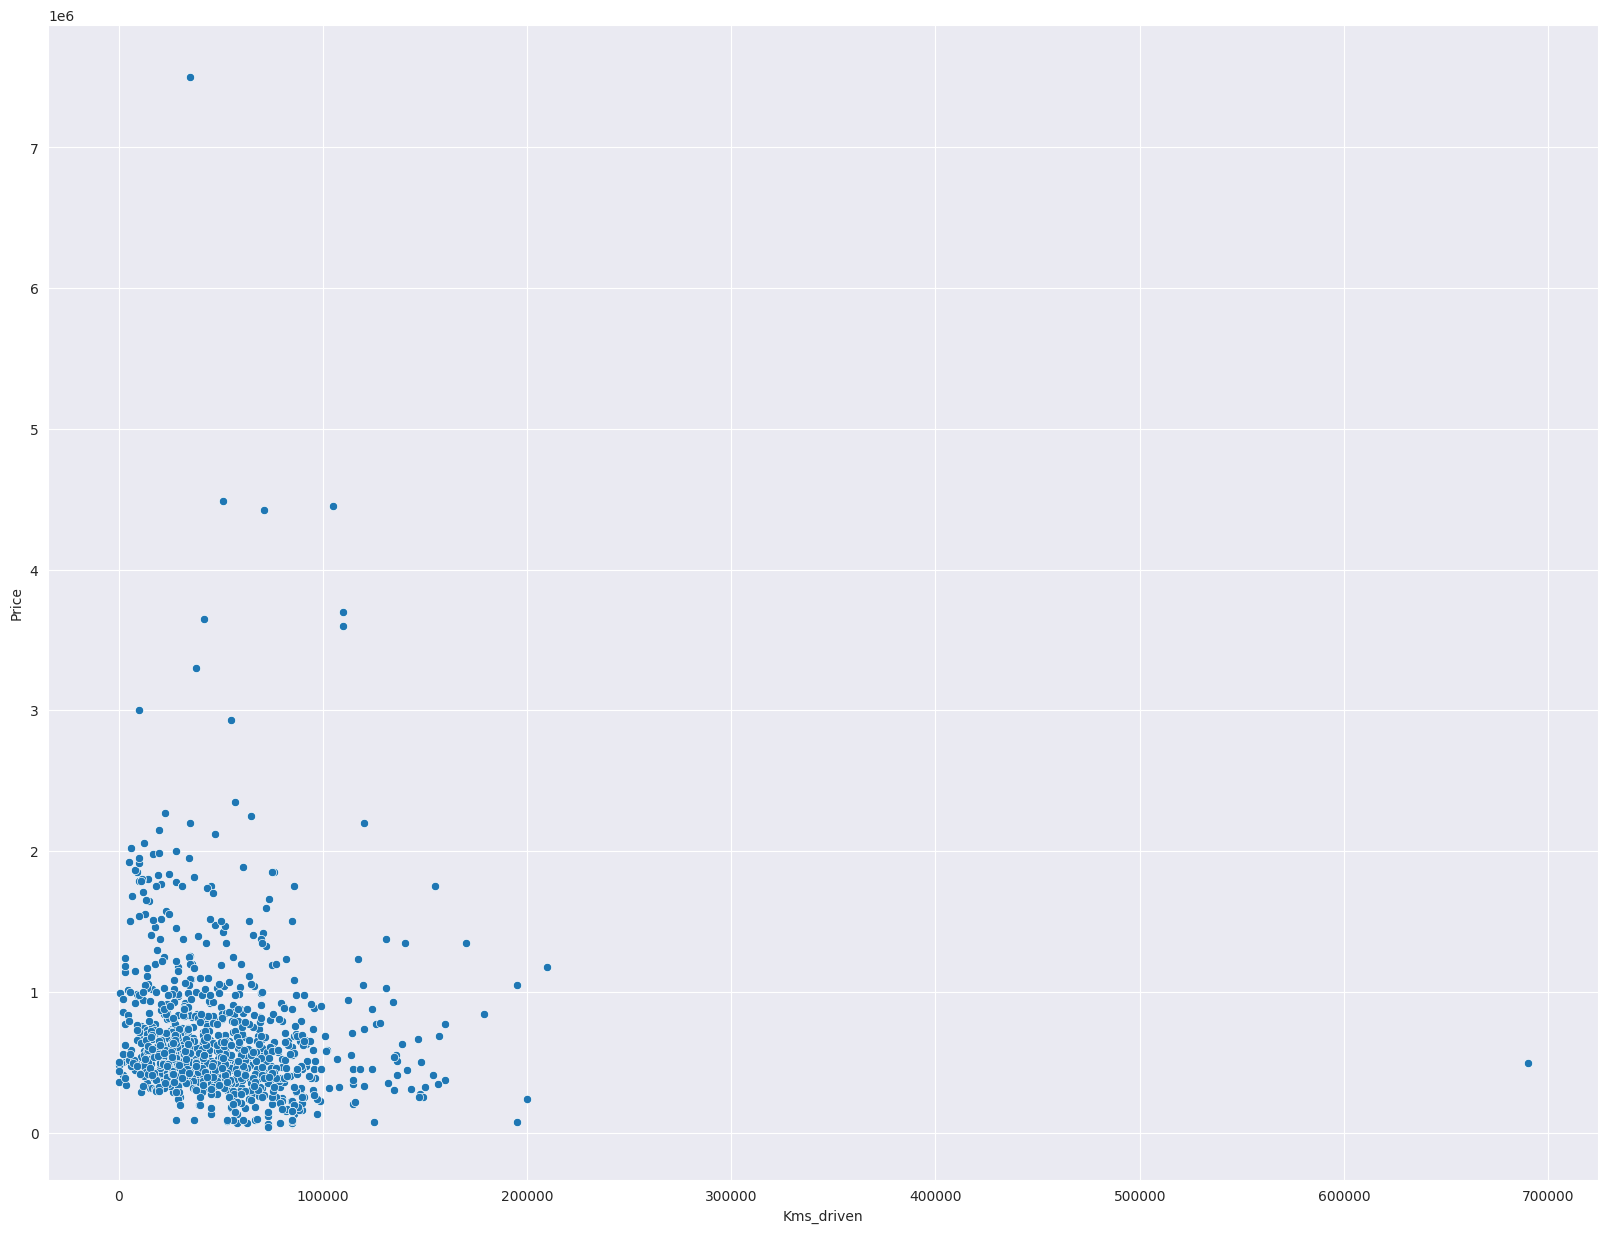

In [ ]:
plt.figure(figsize=(20,15))
sns.scatterplot(x=df['Kms_driven'],y=df['Price'])
plt.show()

In [ ]:
lesskms=df[df['Kms_driven']<=100000]
lesskms=lesskms['Kms_driven']
lesskms

0       35056
1       44000
2       42917
3       16112
4       30988
        ...  
1027    65000
1028    60000
1029    31000
1030    31000
1031    31000
Name: Kms_driven, Length: 961, dtype: int64

In [ ]:
lessprice=df[df['Price']<=1500000]
lessprice=lessprice['Price']
lessprice

0        380000
1        465000
2       1350000
3       1019699
4        713499
         ...   
1024     375000
1025     525000
1026     550000
1027     229000
1028     275000
Name: Price, Length: 955, dtype: int64

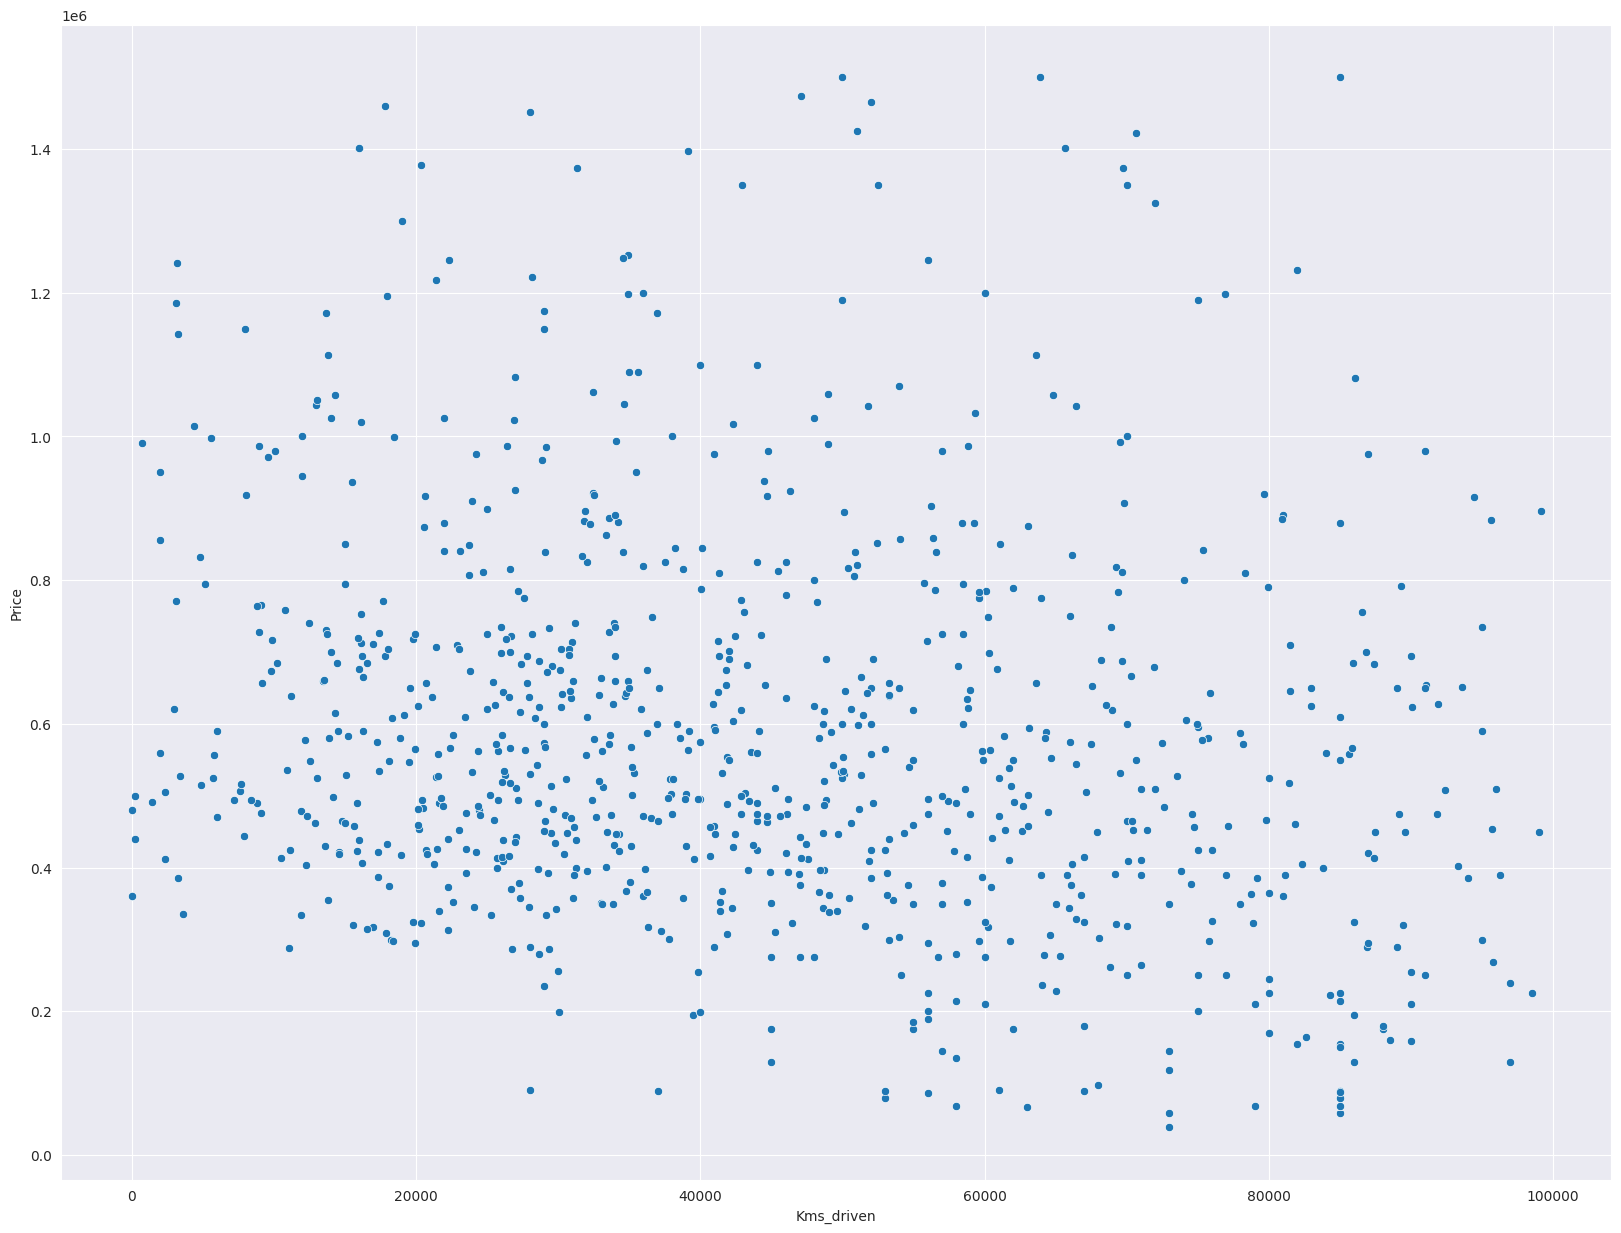

In [ ]:
plt.figure(figsize=(20,15))
sns.scatterplot(x=lesskms,y=lessprice)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 33.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


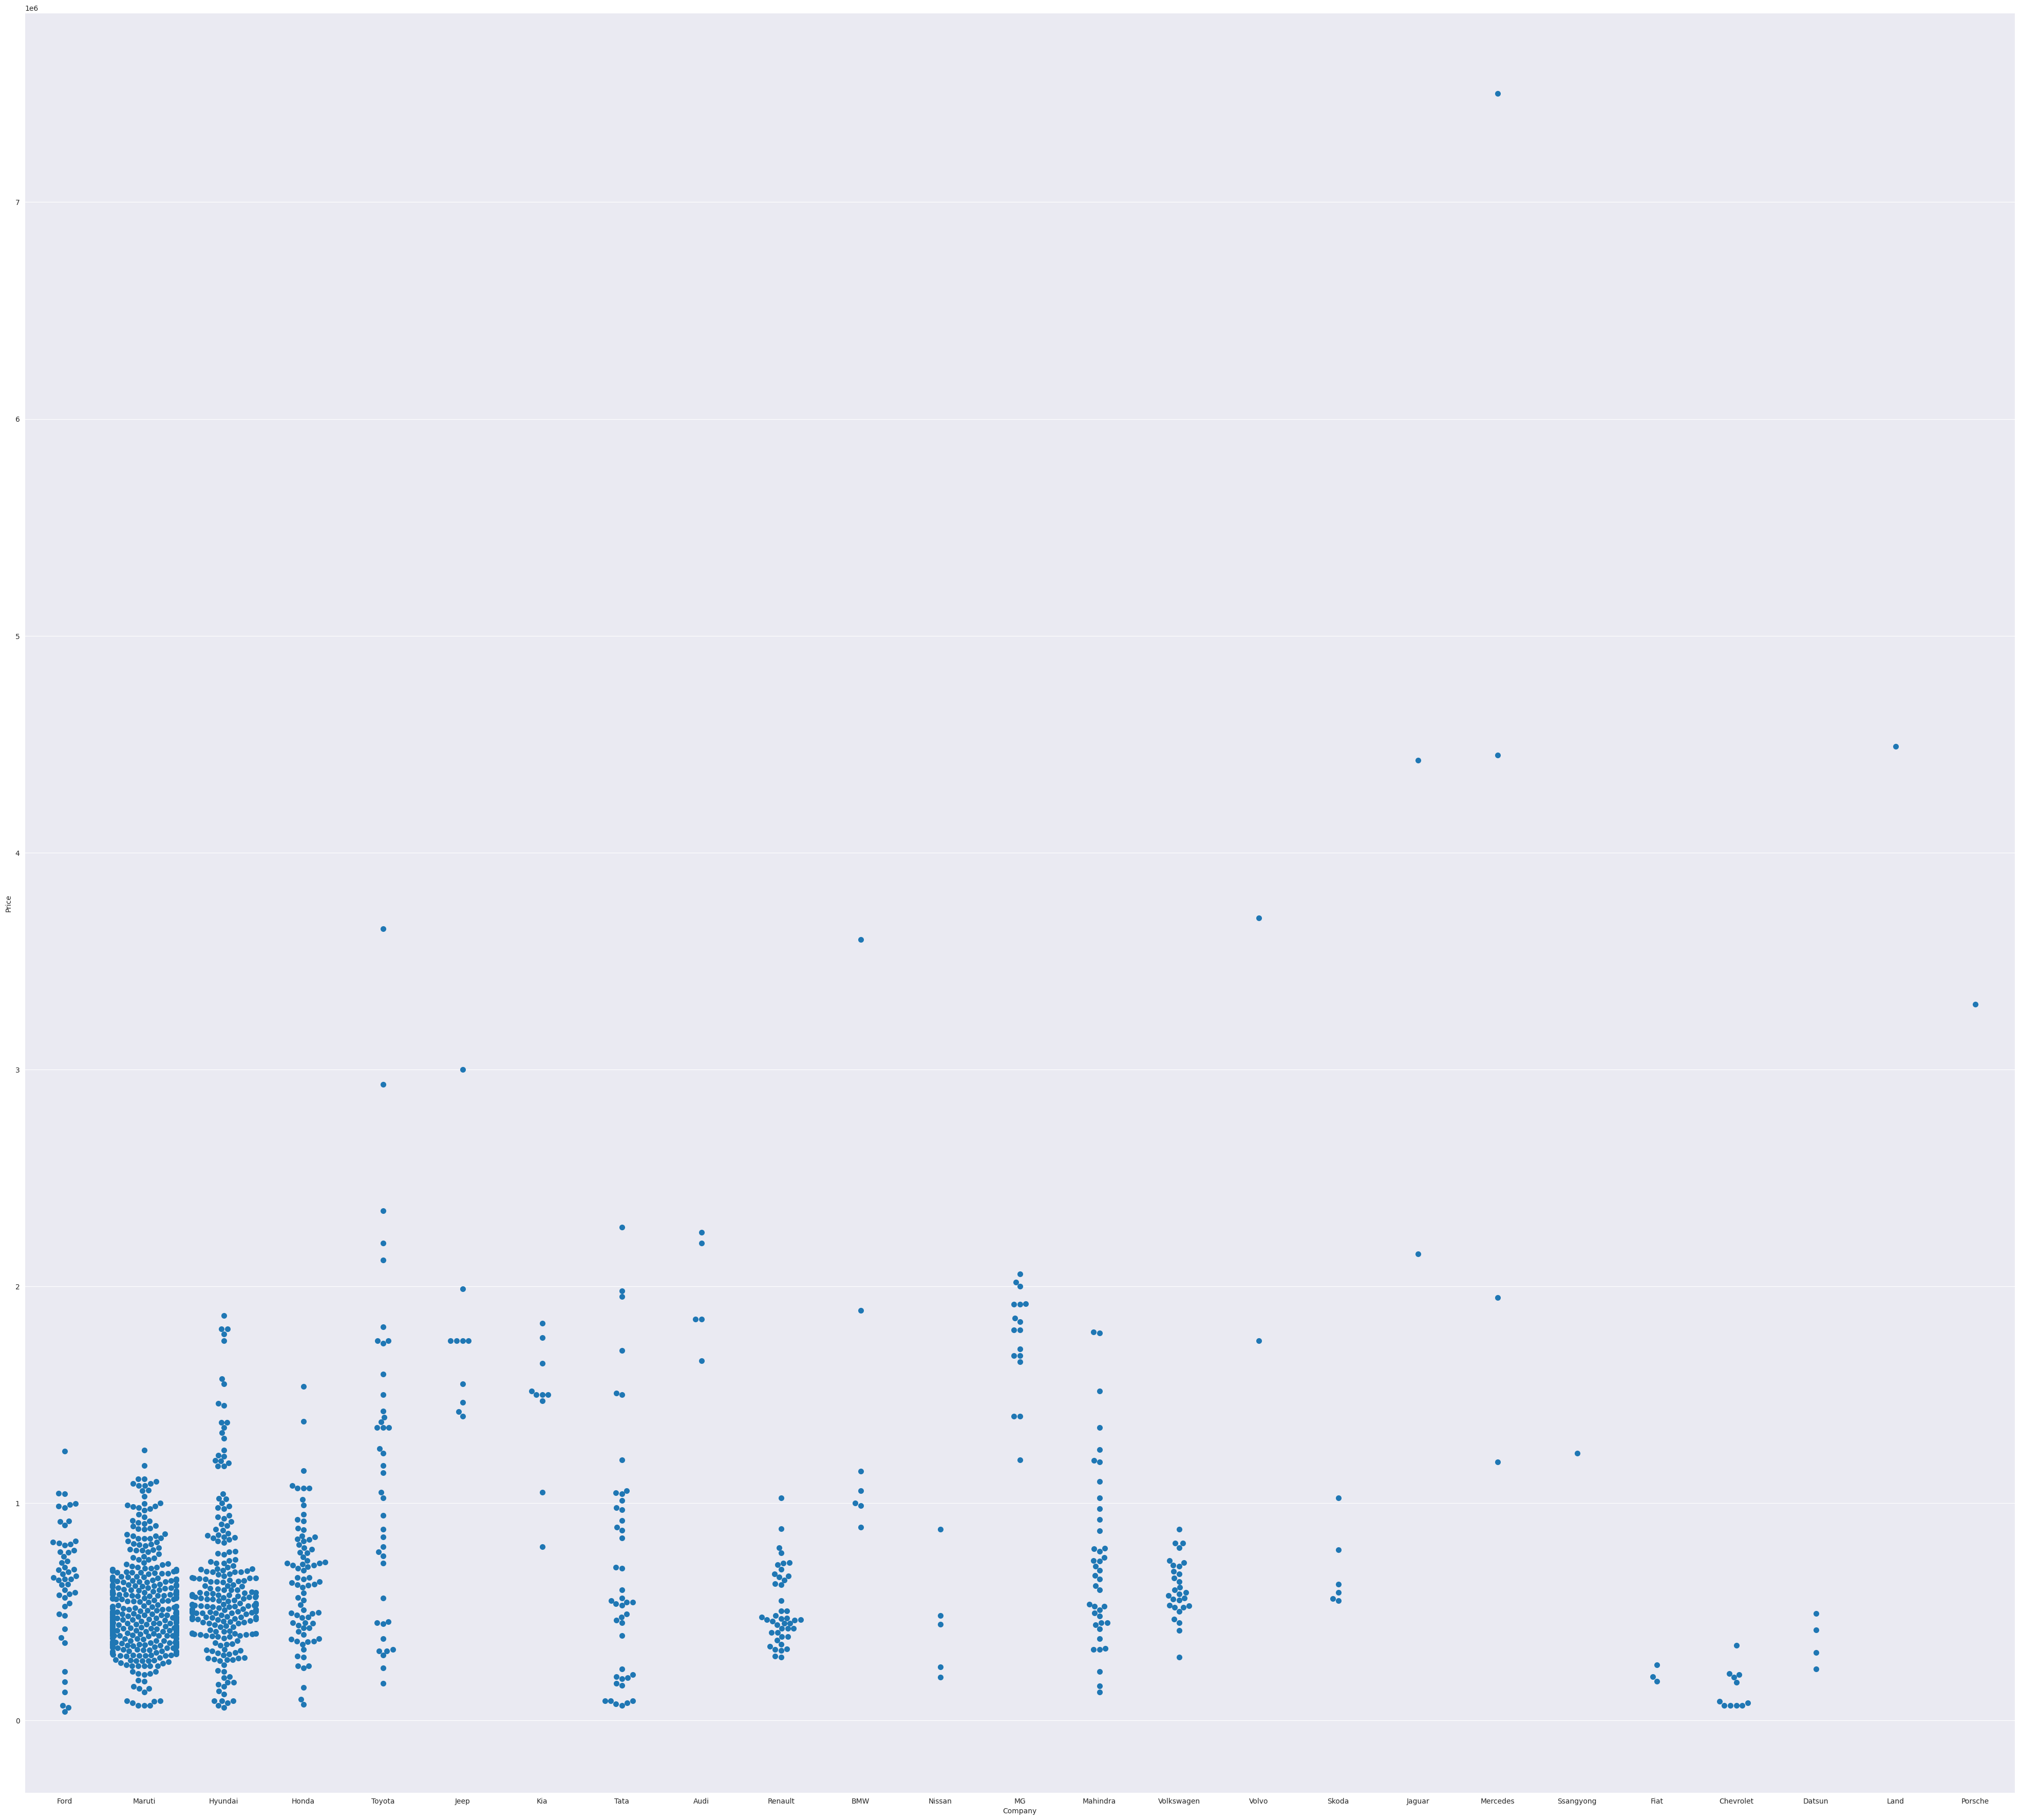

In [ ]:
plt.figure(figsize=(50,45))
sns.swarmplot(x=df['Company'],y=df['Price'],size=8)
plt.show()

In [ ]:
df3=df.sort_values(by=['Price'],ascending=False)
df3

,Name,Label,Price,Kms_driven,Year,Company,Ahmedabad,Anand,Bangalore,Bhubaneswar,...,Udaipur,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol
718,Mercedes Benz GLE,1,7500000,35000,2019,Mercedes,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
928,Land Rover Range,1,4490000,51000,2017,Land,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
143,Mercedes Benz GL,1,4450000,105000,2016,Mercedes,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
142,Jaguar XJ L,1,4425000,71000,2016,Jaguar,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
66,Volvo XC90 D5,1,3700000,110000,2016,Volvo,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Maruti Suzuki 800,1,69000,85000,2000,Maruti,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
405,Chevrolet Aveo,1,67000,63000,2007,Chevrolet,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
406,Ford Ikon,1,59000,73000,2009,Ford,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
232,Hyundai Santro,1,59000,85000,2001,Hyundai,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


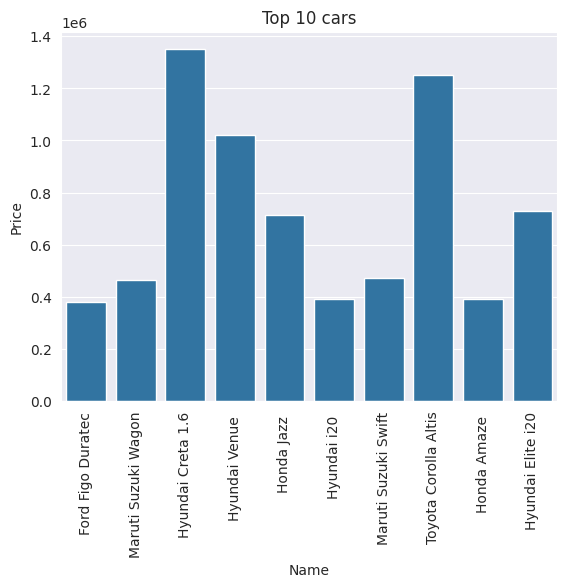

In [ ]:
top10=df[0:10]
sns.barplot(x=top10['Name'],y=top10['Price'])
plt.xticks(rotation=90)
plt.title("Top 10 cars")
plt.show()

<ipython-input-49-7875144c5a1b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Year'])


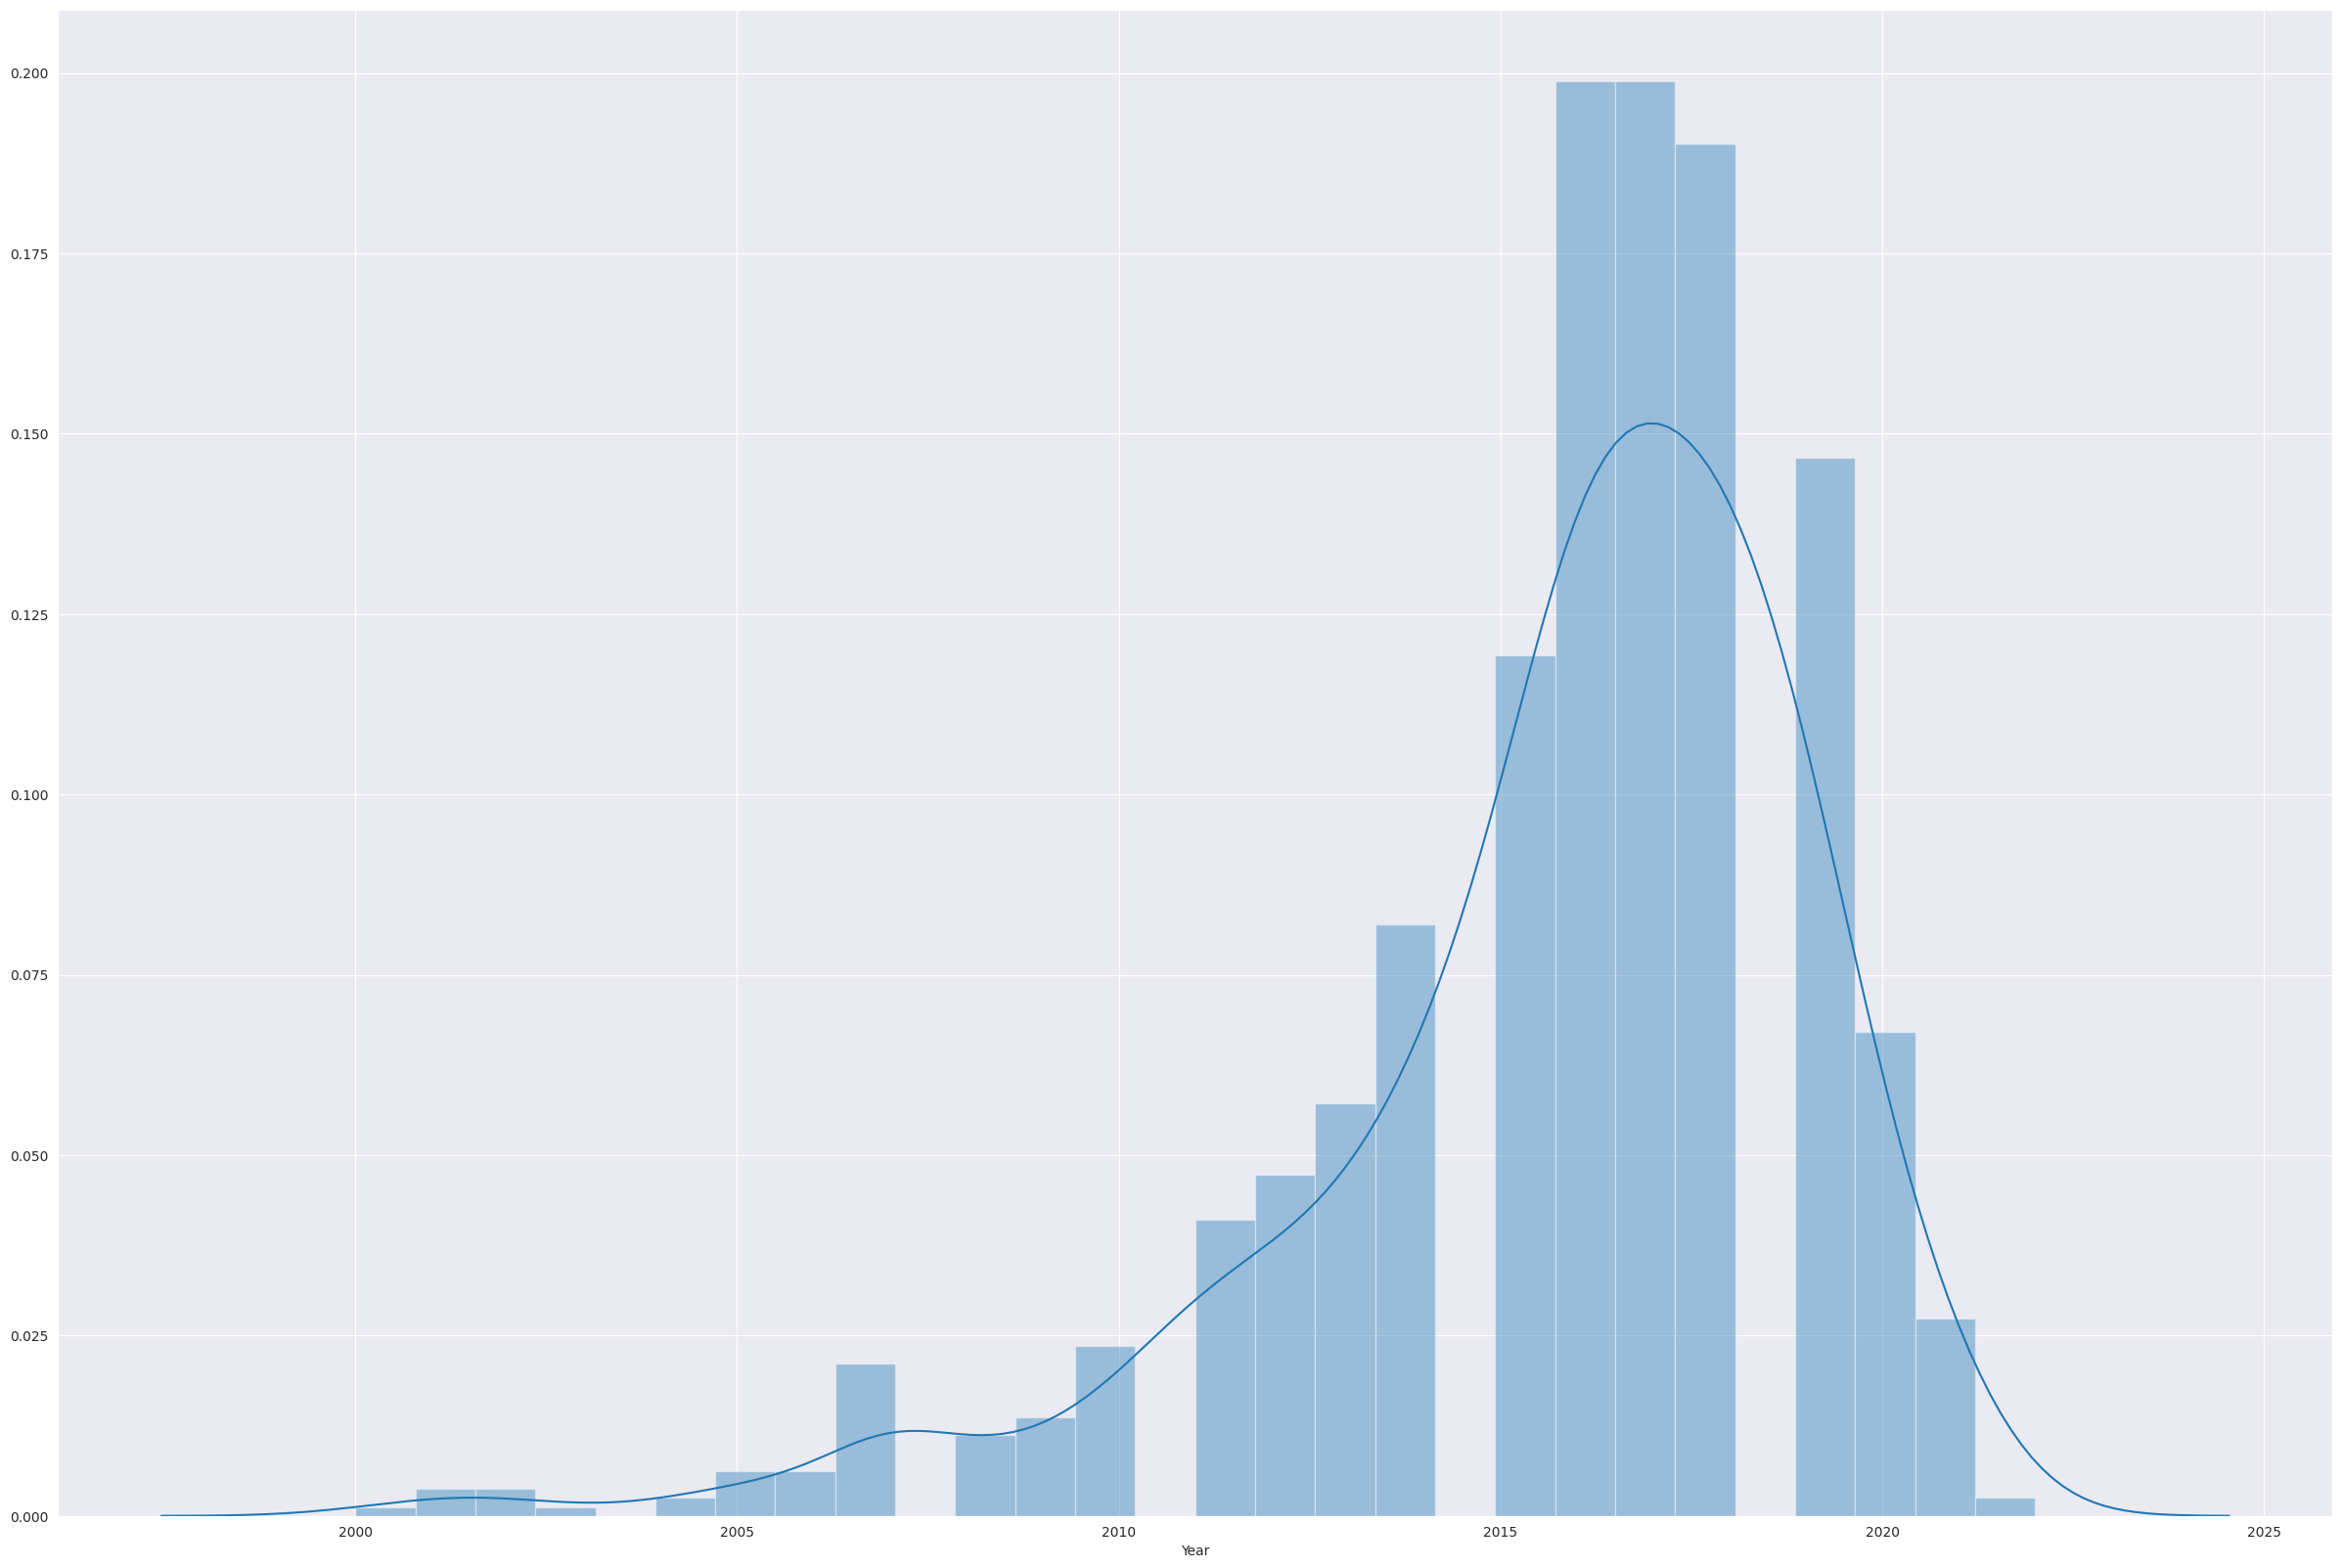

In [ ]:
plt.figure(figsize=(30,20))
sns.distplot(df['Year'])
plt.xlabel('Year')
plt.ylabel('')
plt.show()

In [ ]:
dummies3=pd.get_dummies(df['Name'],dtype=int)
dummies3

,Audi Q3,Audi Q5 2.0,Audi Q7 3.0,Audi Q7 35,BMW 3 Series,BMW 5 Series,BMW X5 xDrive30d,Chevrolet Aveo,Chevrolet Beat,Chevrolet Beat LS,...,Volkswagen Polo,Volkswagen Polo COMFORTLINE,Volkswagen Polo Comfortline,Volkswagen Polo GT,Volkswagen Polo HIGHLINE1.2L,Volkswagen Polo Highline,Volkswagen Vento,Volkswagen Vento Highline,Volvo XC60 D3,Volvo XC90 D5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df=df.drop(['Name'],axis=1)
df=pd.concat([df,dummies3],axis=1)
df=df.drop(df.columns[228],axis=1)
df

,Label,Price,Kms_driven,Year,Company,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,...,Volkswagen Polo,Volkswagen Polo COMFORTLINE,Volkswagen Polo Comfortline,Volkswagen Polo GT,Volkswagen Polo HIGHLINE1.2L,Volkswagen Polo Highline,Volkswagen Vento,Volkswagen Vento Highline,Volvo XC60 D3,Volvo XC90 D5
0,2,380000,35056,2015,Ford,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,465000,44000,2016,Maruti,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1350000,42917,2018,Hyundai,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1019699,16112,2019,Hyundai,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,713499,30988,2017,Honda,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1,229000,65000,2014,Hyundai,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1028,1,275000,60000,2014,Maruti,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1029,1,1750000,31000,2017,Jeep,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1030,1,1750000,31000,2017,Jeep,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dummies4=pd.get_dummies(df['Company'],dtype=int)
dummies4

,Audi,BMW,Chevrolet,Datsun,Fiat,Ford,Honda,Hyundai,Jaguar,Jeep,...,Mercedes,Nissan,Porsche,Renault,Skoda,Ssangyong,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1029,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1030,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df=df.drop(['Company'],axis=1)
df=pd.concat([df,dummies4],axis=1)
df=df.drop(df.columns[24],axis=1)
df

,Label,Price,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,BolpurSantiniketan,...,Mercedes,Nissan,Porsche,Renault,Skoda,Ssangyong,Tata,Toyota,Volkswagen,Volvo
0,2,380000,35056,2015,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,465000,44000,2016,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1350000,42917,2018,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1019699,16112,2019,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,713499,30988,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1,229000,65000,2014,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1028,1,275000,60000,2014,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1029,1,1750000,31000,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1030,1,1750000,31000,2017,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# def normalise(feature):
#     featur=feature-np.mean(feature)/np.std(feature)
#     return feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
df['Kms_driven']

0       35056
1       44000
2       42917
3       16112
4       30988
        ...  
1027    65000
1028    60000
1029    31000
1030    31000
1031    31000
Name: Kms_driven, Length: 1024, dtype: int64

In [ ]:
Kms_driven=np.array(df['Kms_driven'])
Kms_driven=Kms_driven.reshape(-1,1)
Kms_driven

array([[35056],
       [44000],
       [42917],
       ...,
       [31000],
       [31000],
       [31000]])

In [ ]:
df['Kms_driven']=scaler.fit_transform(Kms_driven)
df['Kms_driven']

0      -0.398319
1      -0.163683
2      -0.192094
3      -0.895296
4      -0.505039
          ...   
1027    0.387231
1028    0.256061
1029   -0.504724
1030   -0.504724
1031   -0.504724
Name: Kms_driven, Length: 1024, dtype: float64

In [ ]:
Y=df['Price']
Y

0        380000
1        465000
2       1350000
3       1019699
4        713499
         ...   
1027     229000
1028     275000
1029    1750000
1030    1750000
1031    1750000
Name: Price, Length: 1024, dtype: int64

In [ ]:
X=df.drop(['Price'],axis=1)
X

,Label,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,BolpurSantiniketan,Chandigarh,...,Mercedes,Nissan,Porsche,Renault,Skoda,Ssangyong,Tata,Toyota,Volkswagen,Volvo
0,2,-0.398319,2015,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,-0.163683,2016,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,-0.192094,2018,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,-0.895296,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,-0.505039,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1,0.387231,2014,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1028,1,0.256061,2014,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1029,1,-0.504724,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1030,1,-0.504724,2017,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Year=np.array(X['Year'])
Year=Year.reshape(-1,1)
Year

array([[2015],
       [2016],
       [2018],
       ...,
       [2017],
       [2017],
       [2017]])

In [ ]:
X['Year']=scaler.fit_transform(Year)
X['Year']

0      -0.241586
1       0.053622
2       0.644036
3       0.939243
4       0.348829
          ...   
1027   -0.536793
1028   -0.536793
1029    0.348829
1030    0.348829
1031    0.348829
Name: Year, Length: 1024, dtype: float64

In [ ]:
X

,Label,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,BolpurSantiniketan,Chandigarh,...,Mercedes,Nissan,Porsche,Renault,Skoda,Ssangyong,Tata,Toyota,Volkswagen,Volvo
0,2,-0.398319,-0.241586,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,-0.163683,0.053622,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,-0.192094,0.644036,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,-0.895296,0.939243,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,-0.505039,0.348829,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1,0.387231,-0.536793,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1028,1,0.256061,-0.536793,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1029,1,-0.504724,0.348829,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1030,1,-0.504724,0.348829,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=1)

In [ ]:
X_train

,Label,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,BolpurSantiniketan,Chandigarh,...,Mercedes,Nissan,Porsche,Renault,Skoda,Ssangyong,Tata,Toyota,Volkswagen,Volvo
884,1,-0.386671,0.348829,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408,2,-0.923628,0.348829,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
724,2,0.115578,-0.536793,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
852,2,-0.227903,-0.241586,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
936,2,-0.409180,0.939243,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,2,0.935337,0.053622,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,2,0.497807,0.348829,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
915,2,0.009435,0.644036,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
235,1,0.911910,-4.079280,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test

,Label,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,BolpurSantiniketan,Chandigarh,...,Mercedes,Nissan,Porsche,Renault,Skoda,Ssangyong,Tata,Toyota,Volkswagen,Volvo
836,1,0.177359,-2.012829,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
801,2,-0.675665,0.939243,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,1,-0.006279,-0.536793,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
828,2,-0.192724,0.348829,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
865,2,0.671135,-1.422415,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,2,1.200458,0.053622,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,2,-0.935801,0.939243,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1017,2,-0.795711,0.053622,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
268,2,-0.497274,-0.536793,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y_train

884     950000
408     462399
724     375899
852     531999
936    1045799
        ...   
773     684099
72      818599
915     462299
235      89000
37      412199
Name: Price, Length: 819, dtype: int64

In [ ]:
Y_test

836     145000
801     473699
499     525000
828     619599
865     298599
         ...  
776     509699
587     422299
1017    294799
268     399899
982      89000
Name: Price, Length: 205, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

Y_predicted=lr.predict(X_test)

print("The first five test values are:")
print(np.array(Y_test[0:5]))

print("The first five predicted values are:")
print(Y_predicted[0:5])

The first five test values are:
[145000 473699 525000 619599 298599]
The first five predicted values are:
[ 53968. 495616. 555696. 602912. 168416.]


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_predicted)
r2

-3.293124192697743e+21

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr,X,Y,cv=10))
print(np.average(cross_val_score(lr,X,Y,cv=10)))

[-2.53794550e+20 -3.05829261e+22 -1.51922320e+20 -7.00741234e+25
 -1.06213431e+22 -1.21440487e+25 -5.20210835e+19 -1.31204279e+21
 -2.22551521e+24 -4.38271670e+21]
-8.449104415102568e+24


In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,Y_train)

Y_predicted=lasso.predict(X_test)

print("The first five test values are:")
print(np.array(Y_test[0:5]))

print("The first five predicted values are:")
print(Y_predicted[0:5])

The first five test values are:
[145000 473699 525000 619599 298599]
The first five predicted values are:
[ 53843.01651748 495686.12243223 554762.66887964 602822.69669023
 168199.68956828]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.720e+12, tolerance: 2.437e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
r2=r2_score(Y_test,Y_predicted)
r2

0.5768572162664369

In [ ]:
scores=cross_val_score(lasso,X,Y,cv=10)
print(scores)
print(np.average(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.096e+12, tolerance: 2.664e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.830e+12, tolerance: 2.315e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.628e+12, tolerance: 2.654e

[0.4603673  0.21875477 0.63516246 0.77433614 0.78801139 0.53863597
 0.35848988 0.60561569 0.2761141  0.48657223]
0.5142059912469852


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.558e+12, tolerance: 2.700e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,Y_train)

Y_predicted=ridge.predict(X_test)

print("The first five test values are:")
print(np.array(Y_test[0:5]))

print("The first five predicted values are:")
print(Y_predicted[0:5])

The first five test values are:
[145000 473699 525000 619599 298599]
The first five predicted values are:
[ -5092.88788694 515015.78344518 555919.40967191 605092.15076618
 115906.22904306]


In [ ]:
r2=r2_score(Y_test,Y_predicted)
r2

0.7345531427552504

In [ ]:
scores2=cross_val_score(ridge,X,Y,cv=10)
print(scores2)
print(np.average(scores2))

[0.62999641 0.65947867 0.74443955 0.7260703  0.73985213 0.64262917
 0.52163819 0.61238297 0.50347379 0.6817263 ]
0.6461687468421052


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)

Y_predicted=dtr.predict(X_test)

print("The first five test values are:")
print(np.array(Y_test[0:5]))

print("The first five predicted values are:")
print(Y_predicted[0:5])

The first five test values are:
[145000 473699 525000 619599 298599]
The first five predicted values are:
[175000. 485299. 580899. 560000. 390000.]


In [ ]:
r2=r2_score(Y_test,Y_predicted)
r2

0.5247762843245216

In [ ]:
scores1=cross_val_score(dtr,X,Y,cv=10)
print(scores1)
print(np.average(scores1))

[ 0.42305127  0.20773652  0.50182054  0.5589004   0.63593288  0.3868029
 -0.16923669  0.4139035   0.19450361  0.44277755]
0.3596192486298026


In [ ]:
import pickle
with open('CarPricePrediction.pickle','wb')as f:
    pickle.dump(dtr, f)

In [ ]:
with open('CarPricePrediction.pickle','rb')as f:
    mp=pickle.load(f)